# Exercise 1: HOG (Histogram of Oriented Gradients) Object Detection

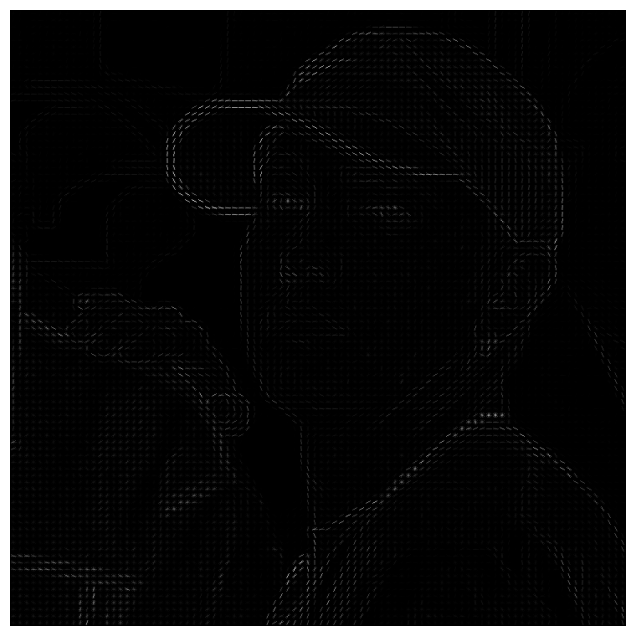

In [ ]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

# Load an Image
image = cv2.imread('eminem.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the HOG descriptor to extract features
features, hog_image = hog(gray_image, orientations = 9, pixels_per_cell =(8, 8),
                          cells_per_block = (2, 2), visualize = True)

# Visualize the gradient orientations on the image
plt.figure(figsize = (8, 8))
plt.axis('off')
plt.imshow(hog_image, cmap = 'gray')
plt.show()

# Exercise 2: YOLO (You Only Look Once) Object Detection

In [ ]:
!pip install opencv-python opencv-python-headless

In [ ]:
# Download YOLOv3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

# Download YOLOv3 config file
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2024-10-13 14:21:07--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  29.6MB/s    in 7.2s    

2024-10-13 14:21:15 (33.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-10-13 14:21:15--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

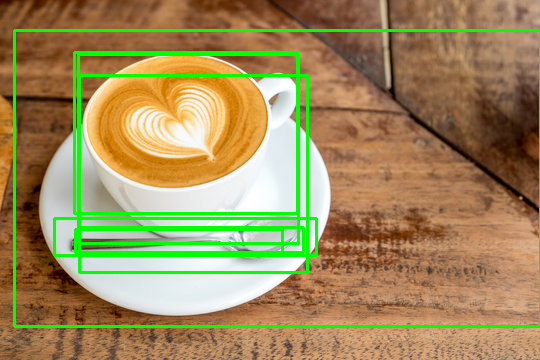

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load YOLO model and configuration
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
layer_names = net.getLayerNames()

# Get the output layers using getUnconnectedOutLayers()
output_layers_indices = net.getUnconnectedOutLayers()

# Ensure output_layers_indices is a NumPy array and reshape if necessary
output_layers_indices = np.array(output_layers_indices).reshape(-1, 1)

# Get the names of the output layers
output_layers = [layer_names[i[0] - 1] for i in output_layers_indices]

# Load an Image
image1 = cv2.imread('coffee.jpg')
height, width, channels = image1.shape

# Prepare the image for YOLO
blob = cv2.dnn.blobFromImage(image1, 0.00392, (416, 416), (0, 0, 0), True, crop = False)
net.setInput(blob)
outs = net.forward(output_layers)

# Process detection
for out in outs:
    for detection in out:
        scores = detection[5: ]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Draw bounding box
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image
cv2_imshow(image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Exercise 3: SSD (Single Shot MultiBox Detector) with TensorFlow

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz
!tar -xvzf ssd_mobilenet_v1_coco_2017_11_17.tar.gz

--2024-10-13 14:44:24--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.107.207, 142.250.99.207, 173.194.202.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.107.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76534733 (73M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v1_coco_2017_11_17.tar.gz’

ssd_mobilenet_v1_co 100%[===================>]  72.99M  85.1MB/s    in 0.9s    

2024-10-13 14:44:25 (85.1 MB/s) - ‘ssd_mobilenet_v1_coco_2017_11_17.tar.gz’ saved [76534733/76534733]

ssd_mobilenet_v1_coco_2017_11_17/
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.index
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.meta
ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb
ssd_mobilenet_v1_coco_2017_11_17/model.ckpt.data-00000-of-00001
ssd_mobilenet_v1_coco_2017_11_17/saved_model/
ssd_mobilenet_v1_coco_2017_11_17/sa

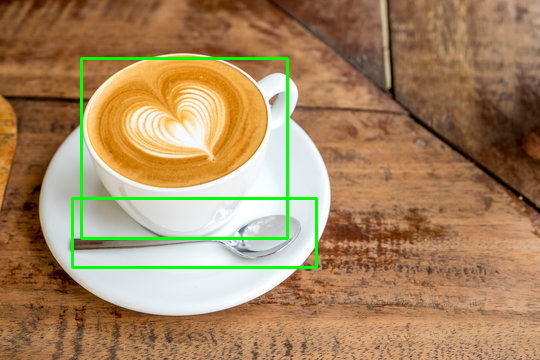

In [ ]:
import tensorflow as tf
import cv2

# Load pre-trained SSD model
model = tf.saved_model.load('ssd_mobilenet_v1_coco_2017_11_17/saved_model')
detection_model = model.signatures['serving_default']

# Load the image
image_path = 'coffee.jpg'
image_np = cv2.imread(image_path)
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

# Run the model
detections = detection_model(input_tensor)

# Visualize the bounding box
for i in range(int(detections.pop('num_detections'))):
    if detections['detection_scores'][0][i] > 0.5:
      # Get bounding box coordinates
      ymin, xmin, ymax, xmax = detections['detection_boxes'][0][i].numpy()
      (left, right, top, bottom) = (xmin * image_np.shape[1], xmax * image_np.shape[1],
                                    ymin * image_np.shape[0], ymax * image_np.shape[0])
      # Draw bounding box
      cv2.rectangle(image_np, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)


# Display the image
cv2_imshow(image_np)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Exercise 4: Traditional vs. Deep Learning Object Detection Comparison

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 9.4 MB/s eta 0:00:00


In [ ]:
import os
import zipfile
import json
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#For Unzipping the file from google drive to colab cloud
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CSST106/Thermal Cheetah.v1-square.yolov8.zip", "r")
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [ ]:
# Paths to dataset folders
train_img_path = "/content/dataset/train/images"
train_label_path = "/content/dataset/train/labels"
val_img_path = "/content/dataset/valid/images"
val_label_path = "/content/dataset/valid/labels"

# Parameters for HOG
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys'
}
# Initialize data lists
X_train, y_train = [], []
X_val, y_val = [], []

In [ ]:
# Function to load and crop positive samples
def load_samples(img_path, label_path, positive=True):
    samples, labels = [], []
    for label_file in os.listdir(label_path):
        img_file = os.path.join(img_path, label_file.replace(".txt", ".jpg"))
        img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        h, w = img.shape[:2]

        # Load bounding box annotations
        with open(os.path.join(label_path, label_file), "r") as f:
            boxes = f.readlines()

        for box in boxes:
            # Parse YOLO format box (class_id, x_center, y_center, width, height)
            data = box.strip().split()
            class_id = int(data[0])  # class ID
            x_center, y_center, width, height = map(float, data[1:])

            # Convert to pixel coordinates
            x1 = int((x_center - width / 2) * w)
            y1 = int((y_center - height / 2) * h)
            x2 = int((x_center + width / 2) * w)
            y2 = int((y_center + height / 2) * h)
            cropped_img = img[y1:y2, x1:x2]

            # Resize to a standard size
            cropped_img = cv2.resize(cropped_img, (64, 128))

            # Extract HOG features
            hog_features = hog(cropped_img, **hog_params)

            # Label the sample (1 for positive, 0 for negative)
            if positive:
                samples.append(hog_features)
                labels.append(1)
            else:
                # Negative samples (random crops)
                for _ in range(5):  # Add more negative samples
                    x_rand, y_rand = np.random.randint(0, w-64), np.random.randint(0, h-128)
                    random_patch = img[y_rand:y_rand+128, x_rand:x_rand+64]
                    if random_patch.shape == (128, 64):
                        random_features = hog(random_patch, **hog_params)
                        samples.append(random_features)
                        labels.append(0)

    return samples, labels

In [ ]:
# Load both positive and negative samples for training
X_train, y_train = load_samples(train_img_path, train_label_path, positive=True)  # Positive samples
X_neg, y_neg = load_samples(train_img_path, train_label_path, positive=False)     # Negative samples

# Combine positive and negative samples
X_train += X_neg
y_train += y_neg

In [ ]:
import time

# Train HOG-SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Validate HOG-SVM with Speed Measurement
X_val_pos, y_val_pos = load_samples(val_img_path, val_label_path, positive=True)   # Positive validation
X_val_neg, y_val_neg = load_samples(val_img_path, val_label_path, positive=False)  # Negative validation

# Combine validation data
X_val = X_val_pos + X_val_neg
y_val = y_val_pos + y_val_neg

# Measure speed for prediction
start_time = time.time()
y_pred = svm.predict(X_val)
end_time = time.time()

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("HOG-SVM Accuracy:", accuracy)

# Calculate average inference time per image
inference_time_per_image = (end_time - start_time) / len(X_val)
print(f"Average Inference Time per Image: {inference_time_per_image:.6f} seconds")

HOG-SVM Accuracy: 0.9756944444444444
Average Inference Time per Image: 0.000356 seconds


# YOLO

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.61 MiB | 16.13 MiB/s, done.
Resolving deltas: 100% (11690/11690), done.
/content/yolov5


In [ ]:
!python train.py --img 640 --batch 16 --epochs 10 --data /content/dataset/data.yaml --weights yolov5s.pt --cache

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-03 13:49:27.921998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-03 13:49:27.971491: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-03 13:49:27.987678: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

In [ ]:
import time
import torch
import cv2

# Load the best weights for evaluation
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt', force_reload=True)

# Function to perform inference on a list of images and calculate speed
def infer_and_evaluate(model, image_paths):
    model.eval()  # Set the model to evaluation mode
    start_time = time.time()  # Start timing

    results = []  # To store results for accuracy calculation
    for image_path in image_paths:
        # Read the image
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img_tensor = torch.from_numpy(img_rgb).permute(2, 0, 1)  # Change shape to (C, H, W)
        img_tensor = img_tensor.float() / 255.0  # Normalize to [0, 1]
        img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

        # Perform inference
        with torch.no_grad():
            pred = model(img_tensor)[0]  # Get predictions

        # Process results
        results.append(pred)

    end_time = time.time()  # End timing
    total_time = end_time - start_time
    avg_time_per_image = total_time / len(image_paths)

    print(f'Inference Time: {total_time:.2f} seconds for {len(image_paths)} images.')
    print(f'Average Inference Time per Image: {avg_time_per_image:.2f} seconds.')

    return results

# Example list of image paths from the validation set
image_paths = ['/content/dataset/valid/images/IMG_0011_jpeg.rf.96047d1e96342c05239fae171688a08e.jpg', '/content/dataset/valid/images/PIR-206_13_mov-2_jpg.rf.d1a6838ec5c6bd925fbdf116e17789be.jpg']  # Replace with actual paths
results = infer_and_evaluate(model, image_paths)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-3 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:865: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:865: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Inference Time: 0.76 seconds for 2 images.
Average Inference Time per Image: 0.38 seconds.


In [ ]:
# Evaluate the model's performance using the validation set
!python val.py --weights runs/train/exp/weights/best.pt --data /content/dataset/data.yaml --img 640 --save-json

val: data=/content/dataset/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/dataset/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/1 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.750s exceeded
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:20<00:00, 20.45s/it]
                   all         25         48    0.00218      0.205     0.0278  